## **Mini Project - 1: Parking your space telescope**

### Exercise 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import optimize
from scipy.optimize import fsolve
import time

This part is extracted from the notebook submitted by group 6.

Using Newton law of gravitation and second law of motion,  we can write the net force on the satellite of mass 'm', located at position (x,y) as-

$$ m\vec{a} = \vec{F_{S}} + \vec{F_{E}} $$

where,

$$ \vec{Fs} = \text{gravitational force act on satellite by sun} $$

$$ \vec{Fe} = \text{gravitational force act on satellite by earth} $$

![alt text](mini1.png)

In the above figure we have taken the origin of coordinate system is at center of mass of earth-sun system. In this way, location of earth is ($ R_{E} $ ,0 ) ,location of sun is ($ -R_{S} $ , 0 ) and location of our satellite is (x , y ).

$$ $$

Now after resolving the component of net force on satellite along x and y direction, we get,

Net Force along x-direction-
$$ ma_{x} = -F_{S}\cos(\alpha) -F_{E}\cos(\beta) $$

Net Force along y-direction-
$$ ma_{y} = -F_{S}\sin(\alpha) -F_{E}\sin(\beta) $$

where,
$$ F_{S} = \frac{GM_{S}m}{ (y^2 + ( x+R_{S} )^2 )^2} $$

$$ F_{E} = \frac{GM_{E}m}{( y^2 + ( x-R_{E} )^2 )^2} $$

$$ \tan(\alpha) = \frac{y}{( x + R_{S} )}$$

$$ \tan(\beta) = \frac{y}{( x - R_{E} )}$$

$$ $$

After putting these into equation (2) and (3), we finally get this,

$$ $$

$$ a_{x} =-\frac{GM_{S}( x + R_{S} )}{( y^2 + ( x+R_{S} )^2 )^{3/2}} -\frac{GM_{E}( x - R_{E} )}{( y^2 + ( x-R_{E} )^2 )^{3/2}} $$


$$ a_{y} =-\frac{GM_{S}y}{( y^2 + ( x+R_{S} )^2 )^{3/2}} -\frac{GM_{E}y}{( y^2 + ( x-R_{E} )^2 )^{3/2}} $$

$$ $$

As we know, Lagrange points are locations where our satellite can rotate synchronously with earth, as the earth rotates around Sun. Therefore,
$$  $$
$$ a_{x} = -\omega^{2} x $$
$$ a_{y} = -\omega^{2} y $$

where,
$$ \omega = \text{Angular velocity of earth rotating around sun in circular orbit} $$

$$ $$

Now to find the lagrange points we have to find the solutions of below equations-

$$ $$

$$ -\frac{GM_{S}( x + R_{S} )}{( y^2 + ( x+R_{S} )^2 )^{3/2}} -\frac{GM_{E}( x - R_{E} )}{( y^2 + ( x-R_{E} )^2 )^{3/2}} + \omega^{2} x = 0 $$

$$ $$

$$ -\frac{GM_{S}y}{( y^2 + ( x+R_{S} )^2 )^{3/2}} -\frac{GM_{E}y}{( y^2 + ( x-R_{E} )^2 )^{3/2}} + \omega^{2} y = 0 $$

Let,
$$ f_{1}(x,y) = -\frac{GM_{S}( x + R_{S} )}{( y^2 + ( x+R_{S} )^2 )^{3/2}} -\frac{GM_{E}( x - R_{E} )}{( y^2 + ( x-R_{E} )^2 )^{3/2}} + \omega^{2} x $$

$$ $$

$$ f_{2}(x,y) = -\frac{GM_{S}y}{( y^2 + ( x+R_{S} )^2 )^{3/2}} -\frac{GM_{E}y}{( y^2 + ( x-R_{E} )^2 )^{3/2}} + \omega^{2} y $$

$$ $$

Thus we have to solve,

$$ f_{1}(x,y) = 0 $$
$$ f_{2}(x,y) = 0 $$

### Exercise 2


In [ ]:
M_r = float(1/333000) #M_r = Ratio of mass of sun to mass of earth
G = 39.3 # This the value of the gravitational constant G in astronomical units , i.e we have converted length from m to AU, mass from kg to solar mass unit and time from sec to year.
R_sun = M_r/(M_r+1)
R_earth = 1/(M_r+1)
omega_sqr = (G*(1 + M_r))


def acc_x(x,y):
  a_sun = ((x+R_sun)/(((x+R_sun)**2+y**2)**(1.5)))
  a_earth = ((M_r*(x-R_earth))/((((x-R_earth)**2)+y**2)**(1.5)))
  a_omega = (omega_sqr*x)
  return np.array(-G*a_sun -G*a_earth +a_omega)

def acc_y(x,y):
    a_sun = (y/(((x+R_sun)**2+y**2)**(1.5)))
    a_earth = ((M_r*y)/((((x-R_earth)**2)+y**2)**(1.5)))
    a_omega = (omega_sqr*y)
    return np.array(-G*a_sun -G*a_earth +a_omega)

X,Y = np.meshgrid(np.linspace(0.98,1.02,100),np.linspace(-0.02,0.02,100))

a_x = acc_x(X,Y)
a_y = acc_y(X,Y)

<ipython-input-15-0226d918d71f>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, a_x, cmap='bwr',vmin = -a_x.max()/0.5e3, vmax = a_x.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)


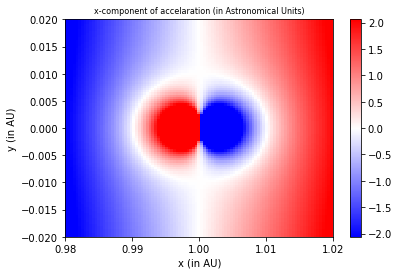

<ipython-input-15-0226d918d71f>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, a_y, cmap='bwr',vmin = -a_y.max()/0.5e3, vmax = a_y.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)


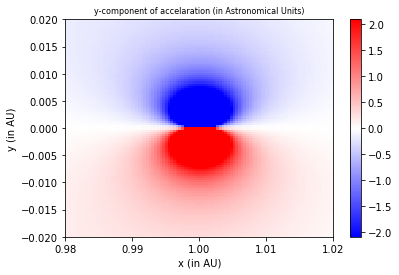

<ipython-input-15-0226d918d71f>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, F_mag, cmap='hot', vmin = 0, vmax = F_mag.max()/7.5e2) #A similar logic as above has been applied


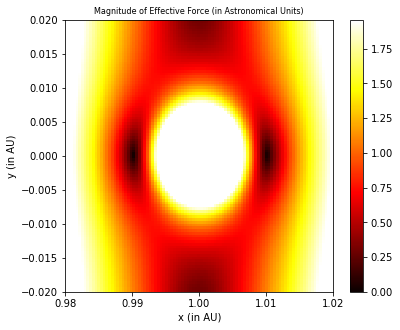

In [ ]:
plt.title('x-component of accelaration (in Astronomical Units)', fontsize = 8)
plt.pcolormesh(X, Y, a_x, cmap='bwr',vmin = -a_x.max()/0.5e3, vmax = a_x.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)
#the factor of 0.5 was obtained by trial and error as it was found to be the best fit for the values of the colorbar
plt.colorbar()
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.show()

plt.title('y-component of accelaration (in Astronomical Units)', fontsize = 8)
plt.pcolormesh(X, Y, a_y, cmap='bwr',vmin = -a_y.max()/0.5e3, vmax = a_y.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)
#the factor of 0.5 was obtained by trial and error as it was found to be the best fit for the values of the colorbar
plt.colorbar()
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.show()

F_mag = np.sqrt(a_x**2 + a_y**2)
plt.figure(figsize = (6,5))
plt.title('Magnitude of Effective Force (in Astronomical Units)', fontsize = 8)
plt.pcolormesh(X, Y, F_mag, cmap='hot', vmin = 0, vmax = F_mag.max()/7.5e2) #A similar logic as above has been applied
plt.colorbar()
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.show()

### Exercise 3

As shown in the above plot for $y = 0$, net force on the satellite becomes zero at close to $x = 0.99$ and $x = 1.01$. For the third point, let's look at the other side of the center of mass (on negative x axis).

In [ ]:
XX,YY = np.meshgrid(np.linspace(-1.02,0.02,100),np.linspace(-0.02,0.02,100))

a_x_ = acc_x(XX, YY)
a_y_ = acc_y(XX, YY)
F_mag_ = np.sqrt(a_x_**2 + a_y_**2)

<ipython-input-17-c78aebc4a05a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, a_x_, cmap='bwr',vmin = -a_x.max()/0.5e3, vmax = a_x.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)


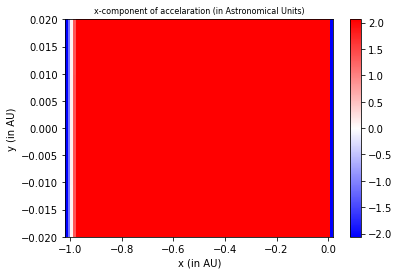

<ipython-input-17-c78aebc4a05a>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, a_y_, cmap='bwr',vmin = -a_y.max()/0.5e3, vmax = a_y.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)


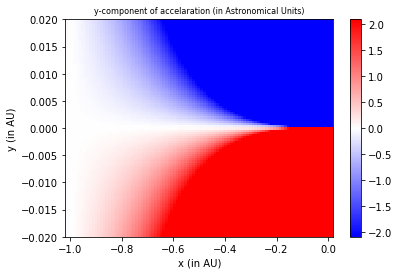

<ipython-input-17-c78aebc4a05a>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, F_mag_, cmap='hot', vmin = 0, vmax = F_mag.max()/7.5e2) #A similar logic as above has been applied


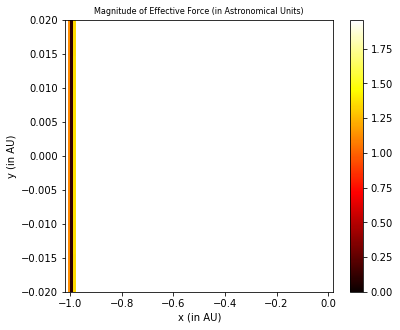

In [ ]:
plt.title('x-component of accelaration (in Astronomical Units)', fontsize = 8)
plt.pcolormesh(XX, YY, a_x_, cmap='bwr',vmin = -a_x.max()/0.5e3, vmax = a_x.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)
#the factor of 0.5 was obtained by trial and error as it was found to be the best fit for the values of the colorbar
plt.colorbar()
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.show()

plt.title('y-component of accelaration (in Astronomical Units)', fontsize = 8)
plt.pcolormesh(XX, YY, a_y_, cmap='bwr',vmin = -a_y.max()/0.5e3, vmax = a_y.max()/0.5e3) #We have scaled the results by a factor of 3, to normalize the order of magnitude (0.1e3)
#the factor of 0.5 was obtained by trial and error as it was found to be the best fit for the values of the colorbar
plt.colorbar()
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.show()

F_mag = np.sqrt(a_x**2 + a_y**2)
plt.figure(figsize = (6,5))
plt.title('Magnitude of Effective Force (in Astronomical Units)', fontsize = 8)
plt.pcolormesh(XX, YY, F_mag_, cmap='hot', vmin = 0, vmax = F_mag.max()/7.5e2) #A similar logic as above has been applied
plt.colorbar()
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.show()

Thus, we see that $x \sim -1$ is also a point where net force is zero. Therefore, obvious choices for the initial guesses are: $x = -1, 0.99, 1.01$.

Substituting $y = 0$ in the equations of $a_x$ and $a_y$, results in $a_y = 0$ and solving the equation for $a_x$ using Newton-Raphson method will give us the required solutions.

In [ ]:
def f_x(x): # We equate y = 0 and simplify the equation
  return (-G*(x+R_sun)/(np.abs(x+R_sun)**3) -G*(M_r*(x-R_earth)/(np.abs(x-R_earth)**3)) +omega_sqr*x)
def derivf_x(x): # The derivative function calculated analytically
  return ((2*G)/((x+R_sun)**2*np.abs(x+R_sun))+(2*G*M_r)/((x-R_earth)**2*np.abs(x-R_earth))+omega_sqr)

def NewtonRaphson(x):
  for i in range (0,500):
    x = x-(f_x(x)/derivf_x(x))
    if np.abs(f_x(x))<1e-4:
      break

  return(x)

In [ ]:
guess_roots = [0.99,1.01,-1.0]
L = []
i=0
start = time.time()
for guess in guess_roots:
  i = i+1
  L.append(NewtonRaphson(guess))
  print(f"The value of the Lagrange Point, L" +str(i),"is given by {}" .format(L[-1]))
end = time.time()
t1 = end - start
print(f'time taken = {t1}')

The value of the Lagrange Point, L1 is given by 0.9900272042196472
The value of the Lagrange Point, L2 is given by 1.0100334597495126
The value of the Lagrange Point, L3 is given by -1.0000012512459282
time taken = 0.0009496212005615234


### Exercise 4

To find $L_4$ and $L_5$ , we need to solve for both,
$$F_1(x,y)=0$$ and,
$$F_2(x,y)=0$$ simultaneously.

These are a pair of now linear algebraic equations. We can solve this using the generalized version of Newton's method, given by,
$$x_{i+1}=x_{i}-\frac{f(x_i)}{\nabla_{\overrightarrow {x}} f(\overrightarrow { x})|_{\overrightarrow{x}=\overrightarrow {x_i}}}$$
$$\implies Δ\overrightarrow{x_i}=-\frac{f(\overrightarrow x_i)}{\nabla_{\overrightarrow {x}} f(\overrightarrow {x})|_{\overrightarrow{x}=\overrightarrow {x_i}}}$$

$$\nabla_{\overrightarrow {x}} f(\overrightarrow {x})|_{\overrightarrow{x}= \overrightarrow {x_i}}\rightarrow Jacobian$$



$$\Delta \overrightarrow {x_i}=-J^{-1}f(\overrightarrow x_i)$$
$$\implies J^{1}\Delta \overrightarrow {x_i}=-f(\overrightarrow x_i)$$

$A\overrightarrow v = \overrightarrow b$ which can be solved using Gaussian elimination or similar methods.

Where Jacobian,
$$J=\left( \begin{array}{cc}
\frac{\partial F_{1}}{\partial x} & \frac{\partial F_{1}}{\partial y}\\
\frac{\partial F_{2}}{\partial x} & \frac{\partial F_{2}}{\partial y}
\end{array}\right) $$
and
$$f(\overrightarrow x_i)=\left(\begin{array}{c}
F_{1}(x,y)\\
F_{2}(x,y)
\end{array}\right)$$

We start out with a reasonable guess(x,y) using the 'lay of ground' (heat map) in different regions around sun earth system

$${L_4}\rightarrow (0.5,1.0)$$
$${L_5}\rightarrow (0.5,-1.0)$$






In [ ]:
def R_e(m):#distance of Earth from the origin
  return m/(1+m)

def R_s(m):#distance of Sun from the origin
  return 1/(1+m)

def F1(r_vect,m):
  r1_vect=r_vect+np.r_[R_s(m),0]
  r2_vect=r_vect-np.r_[R_e(m),0]

  r1=np.linalg.norm(r1_vect)
  r2=np.linalg.norm(r2_vect)

  f1=(m/r1**3)*r1_vect[0]+(1/r2**3)*r2_vect[0]-(1+m)*r_vect[0]

  return f1

def F2(r_vect,m):
  r1_vect=r_vect+np.array([R_s(m),0])
  r2_vect=r_vect-np.array([R_e(m),0])

  r1=np.linalg.norm(r1_vect)
  r2=np.linalg.norm(r2_vect)

  f2=(m/r1**3)*r_vect[1]+(1/r2**3)*r_vect[1]-(1+m)*r_vect[1]

  return f2

m=3.33e5

In [ ]:
def Jacobian(F,x_vect,args,dx=1e-3):
  rows,cols=len(F),len(x_vect)
  J=np.zeros((rows,cols))

  for idx1 in range(rows):
    for idx2 in range(cols):

      dx_vect=np.zeros(cols)
      dx_vect[idx2]+=dx/2

      dfdx=(F[idx1](x_vect+dx_vect,*args)-
            F[idx1](x_vect-dx_vect,*args))/dx

      J[idx1,idx2]=dfdx

  return J

def fn_vect(F,x_vect,args):
  n=len(F)
  f_vect=np.zeros(n)

  for idx in range(n):
    f_vect[idx]=F[idx](x_vect,*args)

  return f_vect

def newton_Rhapson_gen(F,x_vect,max_iter=500,tol=1e-8,args=()):
  iter=0

  while iter<max_iter:
    J=Jacobian(F,x_vect,args)
    f_vect=fn_vect(F,x_vect,args)

    delta_x_vect=np.linalg.solve(-J,f_vect)

    x_vect+=delta_x_vect
    iter+=1

    if np.linalg.norm(delta_x_vect)<tol:
      break

  return x_vect,iter

m=3.33e5
F=[F1,F2]
x4_0=np.r_[0.5,1.0]
x5_0=np.r_[0.5,-1.0]

start = time.time()
L4,_=newton_Rhapson_gen(F,x4_0,args=(m,))
L5,_=newton_Rhapson_gen(F,x5_0,args=(m,))

print("Lagrange point L4: ", L4)
print("Lagrange point L5: ", L5)

end = time.time()

t2 = end - start
print(f'time taken = {t2}')

Lagrange point L4:  [0.499997  0.8660254]
Lagrange point L5:  [ 0.499997  -0.8660254]
time taken = 0.020014286041259766


Plotting all the Lagrange points:

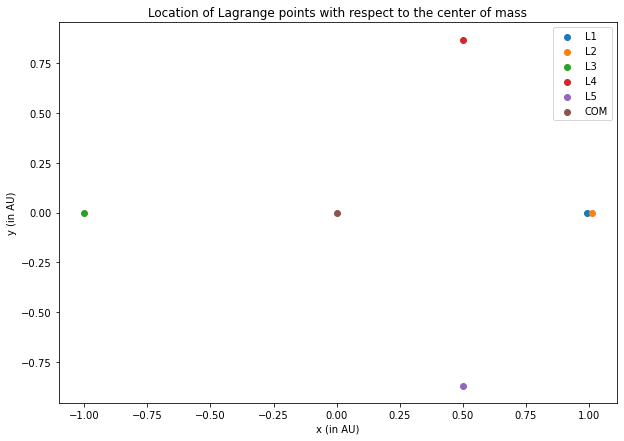

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('Location of Lagrange points with respect to the center of mass')
plt.scatter(L[0], 0, label= 'L1')
plt.scatter(L[1], 0, label= 'L2')
plt.scatter(L[2], 0, label= 'L3')
plt.scatter(L4[0], L4[1], label= 'L4')
plt.scatter(L5[0], L5[1], label= 'L5')

plt.scatter(0, 0, label='COM')
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.legend()

### Exercise 5


In [ ]:
# Finding the Lagrange Points using in-built library functions under scipy
import time
start = time.time()
from scipy.optimize import fsolve
def function(a):
  return [acc_x(a[0],a[1]),acc_y(a[0],a[1])]
root_L1 = fsolve(function,[0.99,0])
root_L2 = fsolve(function,[1.01,0])
root_L3 = fsolve(function,[-1.0,0])
root_L4 = fsolve(function,[0.5,1.0])
root_L5 = fsolve(function,[0.5,-1.0])
print('The co-ordinates of the Lagrange Points obtained using in-built functions are:')
print('L1 (in A.U.) = (',root_L1[0],',',root_L1[1],')')
print('L2 (in A.U.) = (',root_L2[0],',',root_L2[1],')')
print('L3 (in A.U.) = (',root_L3[0],',',root_L3[1],')')
print('L4 (in A.U.) = (',root_L4[0],',',root_L4[1],')')
print('L5 (in A.U.) = (',root_L5[0],',',root_L5[1],')')

end = time.time()
print(f'Total time taken using package = {end - start}')
print(f'Total time taken using Newton method = {t1 + t2}')
# The answers obtained are less precise than
# those obtained using Newton's method (both usual and general)

The co-ordinates of the Lagrange Points obtained using in-built functions are:
L1 (in A.U.) = ( 0.9900271310263177 , 0.0 )
L2 (in A.U.) = ( 1.0100335730336245 , 0.0 )
L3 (in A.U.) = ( -1.0000012512474938 , 0.0 )
L4 (in A.U.) = ( 0.47093972545192264 , 0.8821637330878546 )
L5 (in A.U.) = ( 0.4709397279009294 , -0.8821637317804596 )
Total time taken using package = 0.022919178009033203
Total time taken using Newton method = 0.02096390724182129


### Exercise 6


In [ ]:
def jacobian(xy):      # Creating the Jacobian matrix of the system of equations

    x, y = xy

    return [[-1.0*(2.99999099101804 - 3.0*x)*(1.0*x - 0.999996997006015)/(y**2 + (x - 0.999996997006015)**2)**2.5 - 1.0*(-3.0*x - 9.00898195500914e-6)*(333000.0*x + 0.999996997006015)/(y**2 + (x + 3.00299398500305e-6)**2)**2.5 - 1.0/(y**2 + (x - 0.999996997006015)**2)**1.5 - 333000.0/(y**2 + (x + 3.00299398500305e-6)**2)**1.5 + 333001.0
             , 3.0*y*(1.0*x - 0.999996997006015)/(y**2 + (x - 0.999996997006015)**2)**2.5 + 3.0*y*(333000.0*x + 0.999996997006015)/(y**2 + (x + 3.00299398500305e-6)**2)**2.5],
            [-1.0*y*(2.99999099101804 - 3.0*x)/(y**2 + (x - 0.999996997006015)**2)**2.5 - 333000.0*y*(-3.0*x - 9.00898195500914e-6)/(y**2 + (x + 3.00299398500305e-6)**2)**2.5
             , 3.0*y**2/(y**2 + (x - 0.999996997006015)**2)**2.5 + 999000.0*y**2/(y**2 + (x + 3.00299398500305e-6)**2)**2.5 - 1.0/(y**2 + (x - 0.999996997006015)**2)**1.5 - 333000.0/(y**2 + (x + 3.00299398500305e-6)**2)**1.5 + 333001.0]]


In [ ]:
# Checking stability of Lagrange Points

for i in range(1,4):

  validity = 0    # 0 = stable L point , 5 = unstable L point

  if i == 1:
    L = root_L1
  elif i == 2:
    L = root_L2
  elif i == 3:
    L = root_L3


  for q in range (0,2):
    X = L[0]
    Y = L[1]

    dX = jacobian([X, Y])

  w, v = np.linalg.eig(dX)

  Eigen_value_1 = (w[0])
  Eigen_value_2 = (w[1])
  # print(Eigen_value_1)
  # print(Eigen_value_2)

  if Eigen_value_1 > 0 or Eigen_value_1 > 0 :
    validity = 5  # Validity changes to 5 if even one of the eigenvalues is positive


  if validity == 5:
    print(f"L{i} point is unstable")
  else:
    print(f"L{i} point is stable")



L1 point is unstable
L2 point is unstable
L3 point is unstable


Therefore, L2 is an unstable equilibrium point. Hence after specific time periods, it will move away from its parked position and we would need to use fuel to make the necessary course corrections.

The JWST was designed to carry enough fuel for 10 years, but the precision of the Launch and the first mid-course correction was very efficient. It saved enough fuel to extend its life span by about 10 years, so Scientists will be able to use it services for about 20 years.

When the ratio of the mass of the two bodies ( here the Sun and Earth ) is greater than 25, the L4 and L5 become stable equilibrium points. Thus, these two stable points have a tendency to pull objects towards them and the objects orbit these points. Hence, it is common to see natural objects orbiting L4 and L5 points.

The Sun–Earth L4 and L5 points contain interplanetary dust and at least two asteroids, namely, 2010 TK7 and 2020 XL5.

The Earth–Moon L4 and L5 points contain concentrations of interplanetary dust, known as Kordylewski clouds.
